In [ ]:
pip install yfinance

In [ ]:
pip install update pandas_datareader

In [ ]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt

import yfinance as yf #manual fix found on website linked below ******* need to update pandas datareader too before below fix
yf.pdr_override() #https://stackoverflow.com/questions/74832296/typeerror-string-indices-must-be-integers-when-getting-data-of-a-stock-from-y

In [ ]:
start = dt.date(2020,5,1)
end = dt.datetime.now()
stocks=['AAPL','MSFT']

In [ ]:
df = reader.get_data_yahoo(stocks,start,end)["Adj Close"]


[*********************100%***********************]  2 of 2 completed


In [ ]:
df


,AAPL,MSFT
Date,,
2020-05-01 00:00:00-04:00,70.966866,170.177429
2020-05-04 00:00:00-04:00,71.970985,174.339981
2020-05-05 00:00:00-04:00,73.051186,176.211700
2020-05-06 00:00:00-04:00,73.804871,177.946899
2020-05-07 00:00:00-04:00,74.568367,178.980240
...,...,...
2023-01-18 00:00:00-05:00,135.210007,235.809998
2023-01-19 00:00:00-05:00,135.270004,231.929993
2023-01-20 00:00:00-05:00,137.869995,240.220001


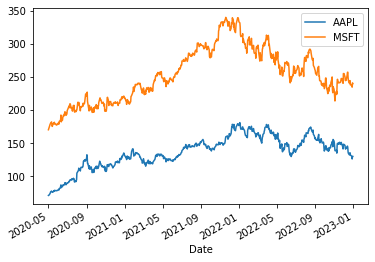

In [ ]:
df.plot()
plt.show()

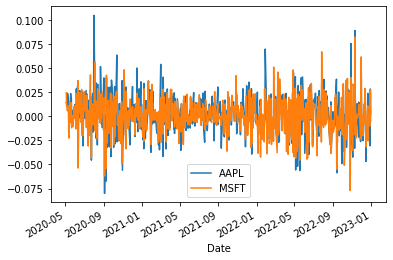

In [ ]:
daily_returns= df.pct_change()
daily_returns.plot()
plt.show()

In [ ]:
daily_cum_returns = (daily_returns+1).cumprod() #daily cummulative stock returns

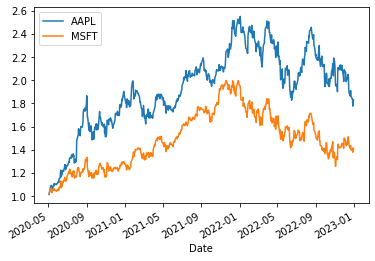

In [ ]:
daily_cum_returns.plot()
plt.show;

#Stock BETA
calculating stock beta base on capital asset pricing model CAPM 
refer to finance slides for more info 

In [ ]:
import statsmodels.api as sm

In [ ]:
end=dt.datetime.now()
start = dt.date(end.year-5,end.month,end.day)   #takes the date 5 years prior to now
stocks = ['MSFT','^GSPC']

In [ ]:
df= reader.get_data_yahoo(stocks,start,end)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:
mtl_returns = df.resample('M').ffill().pct_change()
mtl_returns = mtl_returns.dropna(axis=0)  #value is dropped along row so axis is 0

In [ ]:
mtl_returns

regression section of the code 

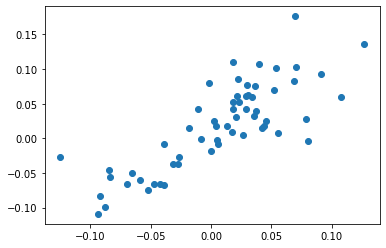

In [ ]:
X=mtl_returns['^GSPC']
y=mtl_returns['MSFT']
plt.scatter(X,y)  #visualise the relationship

In [ ]:
#in stats models the intercept is not added and hence should be manually added
X_sm = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X_sm)
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     105.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.38e-14
Time:                        10:40:47   Log-Likelihood:                 111.58
No. Observations:                  59   AIC:                            -219.2
Df Residuals:                      57   BIC:                            -215.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0125      0.005      2.573      0.013       0.003       0.022
^GSPC          0.9279      0.090     10.274      0.000       0.747       1.109
==============================================================================
Omnibus:                        2.430   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.706
Skew:                           0.396   Prob(JB):                        0.426
Kurtosis:                       3.259   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##visualise the result

In [ ]:
import seaborn as sns

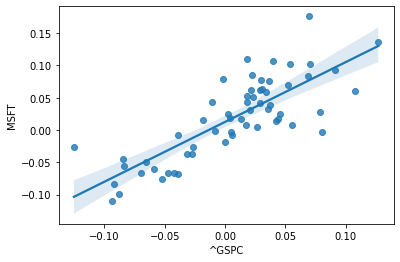

In [ ]:
sns.regplot(x='^GSPC',y='MSFT',data=mtl_returns) #regression plot helps visualise the results 
plt.show;

We havent taken the risk free rate into consideration

we can take into account with the below piece of code 

In [ ]:
import pandas_datareader
rf = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',start,end)

#MOMENTUM TRADING STRATEGY

1.   take 50 best performing stocks over past 12 months 
2.   take 30 best performing stocks over past 6 months from above list
3.   take 10 best performing stocks over past 3 months from above list


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 872.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
yf.pdr_override()

In [ ]:
nifty50 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50")[1]
niftynext50 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_Next_50")[1]
nifty50tickers = nifty50.Symbol.to_list()
niftynext50tickers = niftynext50.Symbol.to_list()
tickers = nifty50tickers + niftynext50tickers

In [ ]:
nasdaq_tickers = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4].Ticker.to_list()


In [ ]:
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol.to_list()

In [ ]:
sp500_tickers

In [ ]:
df = yf.download(sp500_tickers,start='2010-01-01')['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [ ]:
df = df.dropna(axis=1)


In [ ]:
mtl = (df.pct_change()+1)[1:].resample("M").prod()
mtl.head(15)

,A,AAL,AAP,AAPL,ABC,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.895527,1.113207,0.976969,0.897434,1.023658,0.979189,0.994302,0.974328,0.870855,0.851279,...,0.979829,0.902169,0.967480,0.985768,0.931743,0.949052,0.980644,0.938354,0.910359,1.423106
2010-02-28,1.122370,1.380414,1.034220,1.065396,1.031652,1.025312,1.034107,0.975116,1.072755,1.084569,...,1.135341,1.012532,1.027311,1.001443,1.015429,0.986877,0.985677,1.017933,1.094636,0.977876
2010-03-31,1.093133,1.002728,1.028855,1.148471,1.031384,0.970523,1.030684,1.049538,1.020779,0.992337,...,1.059355,1.120544,1.192858,1.030484,1.030461,1.055622,1.136714,1.032618,1.036052,1.177994
2010-04-30,1.054377,0.961905,1.075859,1.111021,1.066736,0.979328,0.991213,1.049417,0.949958,1.038515,...,1.100991,1.094974,1.163655,1.025944,1.011795,1.050745,1.112381,1.028885,0.981419,1.315476
2010-05-31,0.892443,1.248939,1.147672,0.983875,1.016526,0.929633,0.972744,0.859762,0.954762,0.982144,...,0.888824,0.859854,0.953687,0.942069,0.898194,0.884856,0.965346,0.918240,0.946644,0.833923
2010-06-30,0.878554,0.975085,0.970632,0.979173,1.015026,0.983600,1.013330,1.030117,0.823878,0.955091,...,0.989661,0.826679,0.909275,1.017840,0.943930,0.923772,0.953358,0.966387,0.922545,0.900626
2010-07-31,0.982413,1.260163,1.066759,1.022741,0.943937,1.058909,1.050470,1.025614,1.086644,1.066403,...,1.018303,1.250816,1.149600,1.066957,1.045733,1.003677,1.063243,0.980388,1.081592,1.028744
2010-08-31,0.965629,0.833180,1.017560,0.944995,0.912747,1.005298,1.019678,0.923310,0.964485,0.945499,...,0.949020,0.967941,0.921824,1.014552,0.997537,0.925383,1.009685,0.890168,1.043003,0.830479
2010-09-30,1.237301,1.023230,1.078398,1.167215,1.123900,1.058776,1.050125,1.160929,0.944043,1.125538,...,1.070306,1.003822,1.076417,1.040964,1.045339,1.152651,1.104556,1.109392,1.175402,1.159609


In [ ]:
def get_rolling_ret(df,n):
  return df.rolling(n).apply(np.prod)

In [ ]:
ret_12, ret_6 , ret_3 = get_rolling_ret(mtl,12),get_rolling_ret(mtl,6),get_rolling_ret(mtl,3)

In [ ]:
def get_top1(date):
  top_50=ret_12.loc[date].nlargest(50).index
  top_30=ret_6.loc[date,top_50].nlargest(30).index
  top_10=ret_3.loc[date,top_30].nlargest(10).index
  return top_10

In [ ]:
get_top1('2010-12-31')

In [ ]:
portfolio1=mtl.loc['2010-12-31':,get_top1('2010-12-31')][1:2]
portfolio1

###taking only past 3 month performance 
top 10 from previous 3 months

In [ ]:
def get_top2(date):
  return ret_3.loc[date].nlargest(10).index
  

In [ ]:
get_top2('2010-12-31')

Index(['URI', 'RCL', 'AIG', 'FCX', 'CF', 'SWKS', 'BWA', 'F', 'ON', 'SLB'], dtype='object')

Index(['URI', 'RCL', 'AIG', 'FCX', 'CF', 'SWKS', 'BWA', 'F', 'ON', 'SLB'], dtype='object')

In [ ]:
portfolio2=mtl.loc['2010-12-31':,get_top2('2010-12-31')][1:2]
portfolio2

,URI,RCL,AIG,FCX,CF,SWKS,BWA,F,ON,SLB
Date,,,,,,,,,,
2011-01-31,1.171429,0.955319,0.844238,0.909304,0.999186,1.109675,0.931454,0.94997,1.118421,1.065748


#Testing strategy with equal weighted allocation

In [ ]:
portfolio1.mean(axis=1).values[0]     

1.0378742150290798

In [ ]:
def pf_performance(date):
  portfolio = mtl.loc[date:,get_top1(date)][1:2]
  return portfolio.mean(axis=1).values[0]

In [ ]:
pf_performance('2010-12-31')

1.0378742150290798

In [ ]:
returns=[]
for date in mtl.index[:-1]:
  returns.append(pf_performance(date))

In [ ]:
strat1=pd.Series(returns,index=mtl.index[1:])   #turns array into time series we take array from mtl for reference and need to remove first element as we have neglected it
strat2=pd.Series([i - 0.003 for i in returns],index=mtl.index[1:]) #taking transaction costs and fees of 1%

In [ ]:
nas_df = yf.download('^IXIC',start='2010-01-01')['Adj Close'].pct_change()+1
nas_df=nas_df['2011-1-31':]

[*********************100%***********************]  1 of 1 completed


In [ ]:
sp500_df=yf.download('^GSPC',start='2010-01-01')['Adj Close'].pct_change()+1
sp500_df=sp500_df['2011-1-31':]

[*********************100%***********************]  1 of 1 completed


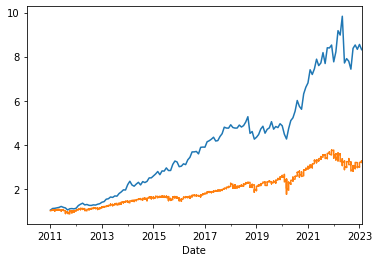

In [ ]:
#strat1.cumprod().plot()
strat2.cumprod().plot()
sp500_df.cumprod().plot()

#Testing strategy with mean variance portfolio
Refer to Finance slides for more info


##calculating daily returns

In [ ]:
dailylr = np.log(df/df.shift(1)).dropna()

In [ ]:
dailypct = df.pct_change().dropna()

In [ ]:
dailypct.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.010863,0.113207,-0.005944,0.001729,-0.007134,-0.008079,-0.003336,0.006180,0.016446,-0.001579,...,-0.002241,0.021229,0.060819,-0.011860,0.003905,-0.011887,-0.003419,0.031656,-0.001744,0.035259
2010-01-06,-0.003553,-0.041431,0.008720,-0.015907,-0.009456,0.005554,-0.004323,0.010631,-0.002122,-0.001897,...,0.016099,-0.011057,-0.013117,0.001921,0.008643,0.006588,-0.007149,-0.000323,-0.007687,0.086956
2010-01-07,-0.001296,0.029469,-0.000247,-0.001849,-0.016037,0.008284,-0.005882,-0.000935,-0.019405,-0.007921,...,-0.002947,-0.004472,0.021356,-0.004312,-0.003141,0.013091,-0.000288,0.022940,-0.025000,0.112000
2010-01-08,-0.000324,-0.019084,0.003953,0.006648,0.010865,0.005112,-0.001972,-0.003978,-0.005422,0.005749,...,-0.001109,-0.009210,-0.007165,0.000481,-0.004012,0.000000,0.000288,-0.021004,-0.003250,-0.016187
2010-01-11,0.000649,-0.019456,-0.009842,-0.008821,0.011133,0.005086,-0.003106,-0.000940,-0.013083,-0.005716,...,0.009989,0.006575,-0.003240,0.009620,0.011220,0.012921,0.017281,0.022100,0.003261,0.006094


In [ ]:
dailylr.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.010922,0.107245,-0.005961,0.001727,-0.007160,-0.008112,-0.003341,0.006161,0.016313,-0.001580,...,-0.002244,0.021007,0.059041,-0.011931,0.003897,-0.011959,-0.003425,0.031165,-0.001745,0.034652
2010-01-06,-0.003560,-0.042314,0.008682,-0.016034,-0.009501,0.005538,-0.004332,0.010575,-0.002124,-0.001899,...,0.015971,-0.011119,-0.013204,0.001919,0.008605,0.006566,-0.007175,-0.000323,-0.007717,0.083382
2010-01-07,-0.001297,0.029043,-0.000247,-0.001850,-0.016167,0.008250,-0.005900,-0.000935,-0.019595,-0.007953,...,-0.002952,-0.004482,0.021131,-0.004321,-0.003146,0.013006,-0.000288,0.022681,-0.025318,0.106160
2010-01-08,-0.000324,-0.019268,0.003945,0.006626,0.010806,0.005099,-0.001974,-0.003986,-0.005436,0.005732,...,-0.001110,-0.009253,-0.007191,0.000481,-0.004020,0.000000,0.000288,-0.021228,-0.003256,-0.016319
2010-01-11,0.000649,-0.019647,-0.009891,-0.008861,0.011071,0.005073,-0.003110,-0.000940,-0.013169,-0.005732,...,0.009940,0.006553,-0.003245,0.009574,0.011157,0.012838,0.017133,0.021860,0.003256,0.006075


##function to calculate cov matrix

In [ ]:
ret1 = dailypct[:'2011-01-31']
np.shape(ret1[-251:])

(251, 438)

In [ ]:
ret1.mean()

A       0.001253
AAL     0.003409
AAP     0.001818
AAPL    0.001840
ABC     0.001242
          ...   
XRAY    0.000141
YUM     0.001256
ZBH     0.000070
ZBRA    0.001253
ZION    0.002556
Length: 438, dtype: float64

In [ ]:
def ret_matrix(stocks,date):
  returns = dailypct[:date][-251:]
  negative_returns=returns[returns<0]
  negative_returns=negative_returns.replace(np.nan,0)
  negative_returns = negative_returns[stocks].T
  mean_returns = returns.mean()
  mean_returns = mean_returns[stocks]
  returns = returns[stocks].T
  return np.cov(returns),mean_returns,np.cov(negative_returns)


In [ ]:
ret_matrix(get_top1('2010-12-31'),'2010-12-31')[1]

URI     0.003826
RCL     0.002880
AIG     0.003207
SWKS    0.002890
BWA     0.003315
F       0.002244
PXD     0.002382
LVS     0.004642
FTNT    0.002672
WYNN    0.002620
dtype: float64

##function to calculate portfolio performance returns, std

In [ ]:
def portfolio_performance(mean_returns,cov_matrix,weights):
  returns = np.sum(mean_returns*weights)
  std = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))*np.sqrt(252)
  return returns, std

In [ ]:
weights = np.ones(10)*0.1

In [ ]:
cov_matrix , meanReturns, sortino_matrix = ret_matrix(get_top1('2010-12-31'),'2010-12-31')
returns, std = portfolio_performance(meanReturns,sortino_matrix,weights)

In [ ]:
print(round(returns*100,2),round(std*100,2))

0.31 17.88


In [ ]:
import scipy.optimize as sc

##maximise Sharpe ratio

In [ ]:
def negativeSR(weights,meanReturns,cov_matrix,riskfreerate=0):
  preturns, pstd = portfolio_performance(meanReturns,cov_matrix,weights)
  return -(preturns-riskfreerate)/pstd

def maxSR(meanReturns,cov_matrix,riskfreerate = 0,constraintset= (0,1)):
  "minimise the negative sharpe ratio"
  args = (meanReturns,cov_matrix,riskfreerate)
  constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1})
  bounds = tuple(constraintset for asset in range(10))
  result = sc.minimize(negativeSR,np.ones(10)*0.1,args=args,method = 'SLSQP',bounds=bounds,constraints=constraints)
  return result

In [ ]:
result=maxSR(meanReturns,cov_matrix)

In [ ]:
final_weights=np.round(result['x'],4)

In [ ]:
finalreturn = np.sum(portfolio1*final_weights,axis=1)
finalreturn[0]

1.0407640506852032

Minimise variance - mean variance portfolio

In [ ]:
def mean_variance(weights,meanReturns,cov_matrix):
  mean_var_returns, mean_var_std = portfolio_performance(meanReturns,cov_matrix,weights)
  return mean_var_std

def MV_portfolio(meanReturns,cov_matrix,constraintset= (0,1)):
  "minimise the negative sharpe ratio"
  args = (meanReturns,cov_matrix)
  constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1})
  bounds = tuple(constraintset for asset in range(10))
  result = sc.minimize(mean_variance,np.ones(10)*0.1,args=args,method = 'SLSQP',bounds=bounds,constraints=constraints)
  return result

In [ ]:
result_mv = MV_portfolio(meanReturns,cov_matrix)
final_weights_mv=np.round(result_mv['x'],4)
finalreturn_mv = np.sum(portfolio1*final_weights_mv,axis=1)
finalreturn_mv[0]

1.0572540958916794

##combined portfolio function

###maximising Sharpe ratio

In [ ]:
def ret_matrix(stocks,date):
  returns = dailypct[:date][-251:]
  negative_returns=returns[returns<0]
  negative_returns=negative_returns.replace(np.nan,0)
  negative_returns = negative_returns[stocks].T
  mean_returns = returns.mean()
  mean_returns = mean_returns[stocks]
  returns = returns[stocks].T
  return np.cov(returns),mean_returns,np.cov(negative_returns)

def negativeSR(weights,meanReturns,cov_matrix,riskfreerate=0):
  preturns, pstd = portfolio_performance(meanReturns,cov_matrix,weights)
  return -(preturns-riskfreerate)/pstd

def maxSR(meanReturns,cov_matrix,riskfreerate = 0,constraintset= (0,1)):
  "minimise the negative sharpe ratio"
  args = (meanReturns,cov_matrix,riskfreerate)
  constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1})
  bounds = tuple(constraintset for asset in range(10))
  result = sc.minimize(negativeSR,np.ones(10)*0.1,args=args,method = 'SLSQP',bounds=bounds,constraints=constraints)
  return result

def maximising_sharpe_ratio(date):
  current_portfolio = mtl.loc[date:,get_top2(date)][1:2]
  cov_matrix , meanReturns,sortino_matrix = ret_matrix(get_top2(date),date)
  result=maxSR(meanReturns,cov_matrix)
  final_weights=np.round(result['x'],4)
  finalreturn = np.sum(current_portfolio*final_weights,axis=1)
  return finalreturn[0]

def maximising_sortino_ratio(date):
  current_portfolio = mtl.loc[date:,get_top2(date)][1:2]
  cov_matrix , meanReturns,sortino_matrix = ret_matrix(get_top2(date),date)
  result=maxSR(meanReturns,sortino_matrix)
  final_weights=np.round(result['x'],4)
  finalreturn = np.sum(current_portfolio*final_weights,axis=1)
  return finalreturn[0]

###Minimising variance

In [ ]:
def mean_variance(weights,meanReturns,cov_matrix):
  mean_var_returns, mean_var_std = portfolio_performance(meanReturns,cov_matrix,weights)
  return mean_var_std

def MV_portfolio(meanReturns,cov_matrix,constraintset= (0,1)):
  "minimise the negative sharpe ratio"
  args = (meanReturns,cov_matrix)
  constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1})
  bounds = tuple(constraintset for asset in range(10))
  result = sc.minimize(mean_variance,np.ones(10)*0.1,args=args,method = 'SLSQP',bounds=bounds,constraints=constraints)
  return result

def minimise_variance(date):
  current_portfolio = mtl.loc[date:,get_top2(date)][1:2]
  cov_matrix , meanReturns,sortino_matrix = ret_matrix(get_top2(date),date)
  result_mv = MV_portfolio(meanReturns,sortino_matrix)
  final_weights_mv=np.round(result_mv['x'],4)
  finalreturn_mv = np.sum(current_portfolio*final_weights_mv,axis=1)
  return finalreturn_mv[0]

def minimise_downside_var(date):
  current_portfolio = mtl.loc[date:,get_top2(date)][1:2]
  cov_matrix , meanReturns,sortino_matrix = ret_matrix(get_top2(date),date)
  result_mv = MV_portfolio(meanReturns,cov_matrix)
  final_weights_mv=np.round(result_mv['x'],4)
  finalreturn_mv = np.sum(current_portfolio*final_weights_mv,axis=1)
  return finalreturn_mv[0]  

In [ ]:
mtl.index[0:13]

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [ ]:
SR_returns = []
for date in mtl.index[11:-1]:
  SR_returns.append(maximising_sharpe_ratio(date))

In [ ]:
strat3=pd.Series(SR_returns,index=mtl.index[12:])
strat4=pd.Series([i - 0.003 for i in SR_returns],index=mtl.index[12:])

In [ ]:
MV_returns = []
for date in mtl.index[11:-1]:
  MV_returns.append(minimise_variance(date))

In [ ]:
strat5=pd.Series(MV_returns,index=mtl.index[12:])
strat6=pd.Series([i - 0.003 for i in MV_returns],index=mtl.index[12:])

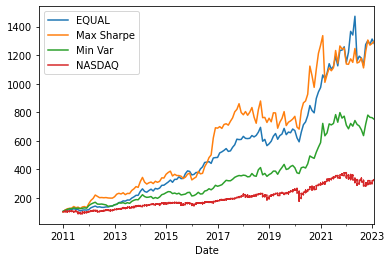

In [ ]:
(strat1.cumprod()*100).plot()
(strat3.cumprod()*100).plot()
(strat5.cumprod()*100).plot()
(sp500_df.cumprod()*100).plot()
plt.legend(['EQUAL','Max Sharpe','Min Var','NASDAQ']);

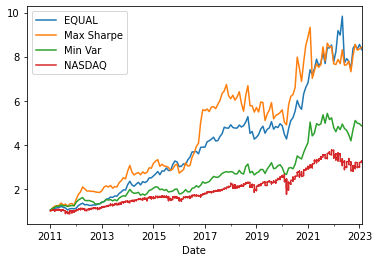

In [ ]:
strat2.cumprod().plot()
strat4.cumprod().plot()
strat6.cumprod().plot()
sp500_df.cumprod().plot()
plt.legend(['EQUAL','Max Sharpe','Min Var','NASDAQ']);

In [ ]:
def drawdown(data):
  Roll_Max = data['Adj Close'].cummax()
  Daily_Drawdown = data['Adj Close']/Roll_Max - 1.0
  Max_Daily_Drawdown = Daily_Drawdown.cummin()
  return Max_Daily_Drawdown

